<a href="https://colab.research.google.com/github/noviantisafitri/Machine-Learning-for-Beginners/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Novianti_Safitri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/noviantisafitri/Machine-Learning-for-Beginners/refs/heads/main/Clustering.csv')
df

,species,length,weight,w_l_ratio,length_binned,Cluster
0,0,0.156364,0.330189,0.428571,0-20,2
1,0,0.020000,0.287736,0.696429,0-20,2
2,0,0.073455,0.332547,0.589286,0-20,2
3,0,0.044000,0.308962,0.642857,0-20,2
4,0,0.162545,0.313679,0.410714,0-20,2
...,...,...,...,...,...,...
3965,8,0.881818,0.950472,0.214286,0-20,3
3966,8,0.880000,0.959906,0.214286,0-20,3
3967,8,0.847273,0.957547,0.232143,0-20,3
3968,8,0.961818,0.990566,0.196429,0-20,3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Jika 'length_binned' kolom kategorikal, kita encode kolom tersebut
label_encoder = LabelEncoder()
df['length_binned'] = label_encoder.fit_transform(df['length_binned'])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Pastikan 'Cluster' adalah label yang ingin diprediksi
y = df['Cluster']

# Bagi data menjadi data latih dan uji (70:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Standarisasi data numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Hanya data numerik yang akan distandarisasi
X_test = scaler.transform(X_test)

# Sekarang data siap untuk klasifikasi

Tahapan diatas adalah proses dalam melakukan persiapan data untuk klasifikasi dengan langkah-langkah berikut: pertama, kolom kategorikal length_binned dikonversi ke bentuk numerik menggunakan Label Encoding. Selanjutnya, data dipisahkan menjadi fitur (X) dan target (y), di mana kolom Cluster menjadi label yang akan diprediksi. Kemudian, data dibagi menjadi data latih (30%) dan data uji (70%) menggunakan train_test_split. Terakhir, fitur numerik distandarisasi menggunakan StandardScaler agar memiliki distribusi dengan rata-rata 0 dan varians 1, memastikan performa optimal pada model klasifikasi.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [27]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
}

Tahap ini menginisialisasi beberapa algoritma klasifikasi yang akan digunakan untuk membangun model. Model yang dipilih meliputi Logistic Regression dan Decision Tree. Setiap model memiliki pendekatan yang berbeda dalam mengklasifikasikan data, sehingga nantinya dapat dibandingkan untuk menentukan performa terbaik berdasarkan metrik evaluasi.

In [28]:
# Latih dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)  # Latih model
    y_pred = model.predict(X_test)  # Prediksi data uji
    accuracy = accuracy_score(y_test, y_pred)  # Hitung akurasi
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.99
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       309
           2       1.00      1.00      1.00       330
           3       1.00      1.00      1.00       305
           4       0.99      1.00      0.99       637
           5       1.00      0.99      0.99       319
           6       0.99      1.00      0.99       279
           7       0.99      1.00      0.99       336
           8       1.00      1.00      1.00       264

    accuracy                           0.99      2779
   macro avg       1.00      0.99      0.99      2779
weighted avg       0.99      0.99      0.99      2779

Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       309
           2       1.00      1.00      1.00       330
           3       1.00      1.00      1.00       305
           4       0.99      1.00      1.00       637
           5  

Kode tersebut melatih dan mengevaluasi beberapa model klasifikasi menggunakan akurasi dan classification report. Model dilatih menggunakan data latih (X_train, y_train), lalu diuji pada data uji (X_test, y_test). Hasil menunjukkan bahwa Logistic Regression memiliki akurasi 99%, sementara Decision Tree mencapai 100%, dengan precision, recall, dan f1-score yang sangat tinggi untuk setiap cluster. Ini mengindikasikan bahwa model mampu mengklasifikasikan cluster dengan sangat baik, namun perlu diperiksa lebih lanjut apakah ada kemungkinan overfitting, terutama pada Decision Tree.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [29]:
# Evaluasi setiap model
for name, model in models.items():
    print(f"\nEvaluasi Model: {name}")

    # Prediksi dengan data uji
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cetak hasil evaluasi
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")


Evaluasi Model: Logistic Regression
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Evaluasi Model: Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


Tahapan tersebut mengevaluasi performa setiap model klasifikasi berdasarkan akurasi, presisi, recall, dan F1-score menggunakan data uji (X_test, y_test). Hasil menunjukkan bahwa Logistic Regression memiliki skor 99% di semua metrik, sedangkan Decision Tree mencapai 100%, mengindikasikan pemisahan cluster yang sangat baik. Namun, skor sempurna pada Decision Tree dapat mengindikasikan overfitting, sehingga perlu diuji lebih lanjut pada data baru atau dengan metode validasi tambahan.

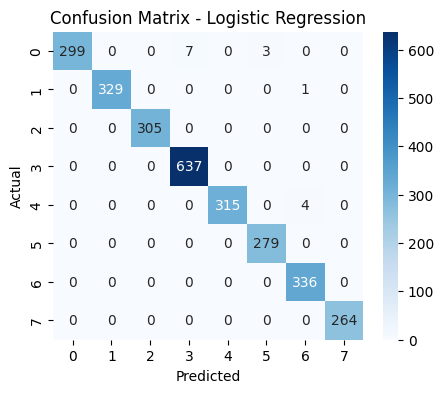

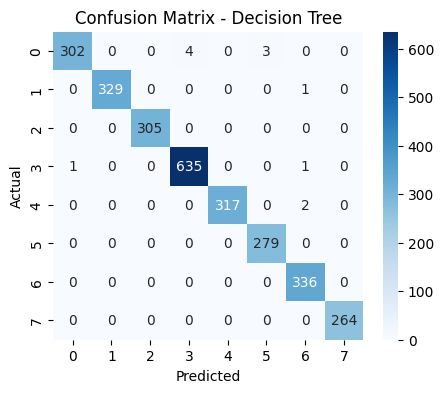

In [30]:
# Menampilkan confusion matrix untuk setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

Pada tahap ini, dilakukan evaluasi model klasifikasi menggunakan Confusion Matrix untuk melihat performa prediksi terhadap data uji. Setiap model, yaitu Logistic Regression dan Decision Tree, menghasilkan matriks yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Logistic Regression menunjukkan beberapa kesalahan prediksi, misalnya kelas 1 memiliki 7 sampel yang diprediksi sebagai kelas 4 dan 3 sampel yang salah diklasifikasikan ke kelas 6. Sementara itu, Decision Tree memiliki akurasi yang lebih tinggi dengan kesalahan yang lebih sedikit, seperti hanya satu kesalahan pada kelas 4 yang diklasifikasikan sebagai kelas 1. Dapat disimpulkan bahwa Decision Tree lebih unggul dibandingkan Logistic Regression dalam membedakan setiap cluster, dengan jumlah kesalahan klasifikasi yang lebih sedikit.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil evaluasi, model **Logistic Regression** dan **Decision Tree** memiliki performa yang sangat baik dalam mengklasifikasikan data. Decision Tree memiliki akurasi sempurna (100%), sedangkan Logistic Regression sedikit lebih rendah (99%) dengan beberapa kesalahan klasifikasi.
- **Logistic Regression mengalami beberapa kesalahan klasifikasi**, terutama di **Cluster 1** yang memiliki beberapa sampel diklasifikasikan sebagai Cluster 4 dan 6. Ini menunjukkan bahwa fitur dalam cluster tersebut memiliki kemiripan sehingga model kesulitan membedakannya.  
- **Tidak ada indikasi overfitting pada Decision Tree**, karena model memiliki akurasi tinggi di data uji. Namun, perlu dipastikan bahwa hasil serupa juga muncul pada data baru.  
- **Tidak ditemukan kelas dengan precision atau recall yang sangat rendah**, yang menunjukkan bahwa model cukup stabil dalam mengklasifikasikan seluruh cluster.  

#### **Rekomendasi Tindakan Lanjutan**  
- **Melakukan Hyperparameter Tuning** terutama pada Logistic Regression, misalnya dengan menyesuaikan **regularisasi (C)** atau mencoba algoritma optimasi lain.  
- **Menambahkan teknik feature selection atau feature engineering** untuk memastikan fitur yang digunakan dapat lebih membedakan setiap cluster.  
- **Menguji model dengan data baru atau validasi silang** untuk memastikan bahwa Decision Tree tidak mengalami *overfitting*.  
- **Mencoba model lain seperti Random Forest atau SVM**, yang mungkin lebih baik dalam menangkap pola kompleks dalam data.  